In [1]:
## 1. Data Encoding

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('new_carpred.csv')
df.head()

,Unnamed: 0,Brand,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car_Age
0,0,Tesla,2.3,Petrol,Manual,114832,New,26613.92,Model X,9
1,1,BMW,4.4,Electric,Manual,143190,Used,14679.61,5 Series,7
2,2,Audi,4.5,Electric,Manual,181601,New,44402.61,A4,12
3,3,Tesla,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,14
4,4,Ford,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   object 
 4   Transmission  2500 non-null   object 
 5   Mileage       2500 non-null   int64  
 6   Condition     2500 non-null   object 
 7   Price         2500 non-null   float64
 8   Model         2500 non-null   object 
 9   Car_Age       2500 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [5]:
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_")
df.drop(columns=["Unnamed:_0"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2500 non-null   object 
 1   Engine_Size   2500 non-null   float64
 2   Fuel_Type     2500 non-null   object 
 3   Transmission  2500 non-null   object 
 4   Mileage       2500 non-null   int64  
 5   Condition     2500 non-null   object 
 6   Price         2500 non-null   float64
 7   Model         2500 non-null   object 
 8   Car_Age       2500 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 175.9+ KB


In [6]:
for col in df.select_dtypes(include="object").columns:
    df[col] = (
        df[col]
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )

In [7]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

print("Encoded shape:", df_encoded.shape)
display(df_encoded.head())

Encoded shape: (2500, 48)


,Engine_Size,Mileage,Price,Car_Age,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,...,Model_Model_S,Model_Model_X,Model_Model_Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,2.3,114832,26613.92,9,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,4.4,143190,14679.61,7,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.5,181601,44402.61,12,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.1,68682,86374.33,14,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,2.6,223009,73577.10,16,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [8]:
# Separate features (X) and target (y)
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]
X = pd.get_dummies(X)


print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (2500, 47)
Target shape: (2500,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {
        "Model ":name,
        "MAE ":mae,
        "RMSE ":rmse,
        "R2 ":r2
    }

In [13]:
LRModel= evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test)
print(LRModel)

{'Model ': 'Linear Regression', 'MAE ': 24051.706536601956, 'RMSE ': np.float64(27828.5689851627), 'R2 ': -0.02273882673304195}


In [14]:
DTModel = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test)
print(DTModel)

{'Model ': 'Decision Tree', 'MAE ': 30462.288533333332, 'RMSE ': np.float64(37082.36582148627), 'R2 ': -0.8160084404586698}


In [15]:
RFModel = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test)
print(RFModel)

{'Model ': 'Random Forest', 'MAE ': 24362.4004948, 'RMSE ': np.float64(28316.739212979817), 'R2 ': -0.05893542472134272}


In [16]:
LaModel = evaluate_model("Lasso Regression", Lasso(alpha=0.001, random_state=42), X_train, X_test, y_train, y_test)
print(LaModel)

{'Model ': 'Lasso Regression', 'MAE ': 24051.705689426337, 'RMSE ': np.float64(27828.567006902824), 'R2 ': -0.022738681325413346}


c:\Users\SHILPA CHOWNI\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.619e+10, tolerance: 1.294e+08
  model = cd_fast.enet_coordinate_descent(


In [17]:
results = []
results.append(LRModel)
results.append(DTModel)
results.append(RFModel)
results.append(LaModel)
results = pd.DataFrame(results)
display(results)

,Model,MAE,RMSE,R2
0,Linear Regression,24051.706537,27828.568985,-0.022739
1,Decision Tree,30462.288533,37082.365821,-0.816008
2,Random Forest,24362.400495,28316.739213,-0.058935
3,Lasso Regression,24051.705689,27828.567007,-0.022739


In [18]:
print(results.columns)

Index(['Model ', 'MAE ', 'RMSE ', 'R2 '], dtype='object')


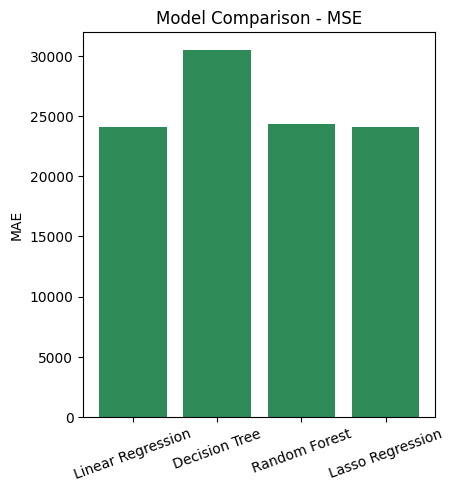

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plt.bar(results["Model "], results["MAE "], color='seagreen')
plt.title("Model Comparison - MSE")
plt.ylabel('MAE')
plt.xticks(rotation=20)
plt.show()

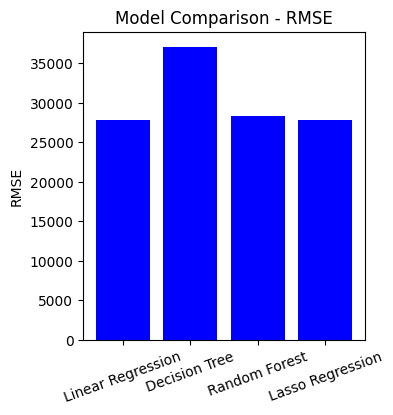

In [20]:
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.bar(results["Model "], results["RMSE "], color='blue')
plt.title("Model Comparison - RMSE")
plt.ylabel('RMSE')
plt.xticks(rotation=20)
plt.show()

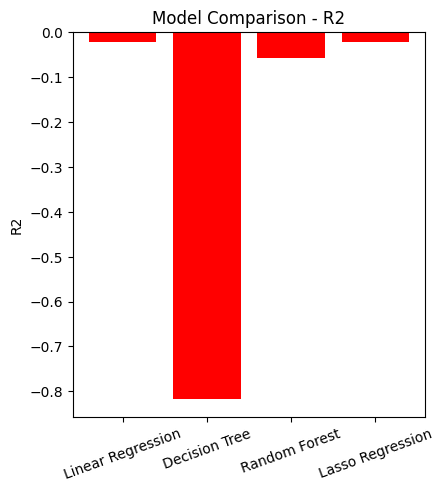

In [21]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plt.bar(results["Model "], results["R2 "], color='red')
plt.title("Model Comparison - R2")
plt.ylabel('R2')
plt.xticks(rotation=20)
plt.show()

In [22]:
# HyperTuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [23]:
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=2
)

In [24]:
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("✅ Best Random Forest Params:", grid_rf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


✅ Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [25]:
y_pred_rf = best_rf.predict(X_test)
print("RMSE (RF):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² (RF):", r2_score(y_test, y_pred_rf))

RMSE (RF): 27819.749151796255
R² (RF): -0.022090647044157752


In [26]:
# XGBoost Tuning

In [27]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, verbosity=0)
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

In [28]:
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("\nBest XGBoost Params:", grid_xgb.best_params_)


Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [29]:
y_pred_xgb = best_xgb.predict(X_test)
print("RMSE (XGB):", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² (XGB):", r2_score(y_test, y_pred_xgb))

RMSE (XGB): 27596.68037645237
R² (XGB): -0.005765379077391053


In [30]:
# LightGBM Tuning

In [31]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=42)
param_grid_lgbm = {
    "n_estimators": [100, 200, 300],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.01, 0.1, 0.2]
}
grid_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

In [32]:
# Ensure y_train and y_test are 1D arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()
X_train.columns = X_train.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")

In [33]:
import re

def clean_feature_names(df):
    df.columns = (
        df.columns
        .str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
        .str.replace(r'_+', '_', regex=True)
    )
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

In [34]:
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_
# Predict with fixed y_test
y_pred_lgbm = best_lgbm.predict(X_test)
print("Best LightGBM Params:", grid_lgbm.best_params_)
print("RMSE (LGBM):", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("R² (LGBM):", r2_score(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 1750, number of used features: 47
[LightGBM] [Info] Start training from score 52509.406593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best LightGBM Params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}
RMSE (LGBM): 27795.888521683464
R² (LGBM): -0.020338131719680463


In [35]:
final_results = []
# Evaluate tuned Random Forest
final_results.append({
    "Model": "Random Forest (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "R²": r2_score(y_test, y_pred_rf)
})
# Evaluate tuned XGBoost
final_results.append({
    "Model": "XGBoost (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    "R²": r2_score(y_test, y_pred_xgb)
})
# Evaluate tuned LightGBM
final_results.append({
    "Model": "LightGBM (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_lgbm),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
    "R²": r2_score(y_test, y_pred_lgbm)
})

In [36]:
final_results = pd.concat([results, pd.DataFrame(final_results)], ignore_index=True)
print("✅ Final Comparison (All Models)")
display(final_results)

✅ Final Comparison (All Models)


,Model,MAE,RMSE,R2,Model,MAE,RMSE,R²
0,Linear Regression,24051.706537,27828.568985,-0.022739,NaN,NaN,NaN,NaN
1,Decision Tree,30462.288533,37082.365821,-0.816008,NaN,NaN,NaN,NaN
2,Random Forest,24362.400495,28316.739213,-0.058935,NaN,NaN,NaN,NaN
3,Lasso Regression,24051.705689,27828.567007,-0.022739,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Random Forest (Tuned),24065.702018,27819.749152,-0.022091
5,NaN,NaN,NaN,NaN,XGBoost (Tuned),23948.322736,27596.680376,-0.005765
6,NaN,NaN,NaN,NaN,LightGBM (Tuned),24084.282129,27795.888522,-0.020338


In [37]:
best_model = final_results.loc[final_results['R²'].idxmax(), 'Model']
print("✅ Best model selected:", best_model)

# Map the model names to objects
model_mapping = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": best_rf,         # tuned version
    "XGBoost (Tuned)": best_xgb,
    "LightGBM (Tuned)": best_lgbm,
    "Lasso Regression": Lasso(alpha=0.001, random_state=42)
}

✅ Best model selected: XGBoost (Tuned)


In [38]:
final_best_model = model_mapping.get(best_model, best_rf)

In [39]:
import joblib
X_train.columns = X_train.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")
joblib.dump(final_best_model, "best_car_price_model.pkl")
print("💾 Model saved as best_car_price_model.pkl")

💾 Model saved as best_car_price_model.pkl


In [40]:
# Save training feature columns (order matters for prediction)
joblib.dump(list(X_train.columns), "model_columns.pkl")
print("✅ Model and columns saved successfully!")

✅ Model and columns saved successfully!


In [41]:
"""
from sklearn.pipeline import Pipeline

Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

joblib.dump(pipeline, "pipeline.pkl")
"""

'\nfrom sklearn.pipeline import Pipeline\n\nPipeline([\n    ("preprocessor", preprocessor),\n    ("model", model)\n])\n\njoblib.dump(pipeline, "pipeline.pkl")\n'